# Credit Risk Model to identify default users.
The data set we have available with us has been extracted from a competition of Kaggle. This dataset contains information on default payments, personal information, demographic factors, credit data, history of payment and bill statements of credit card clients. 

We first import the required packages, 'Pandas', 'Numpy' and 'Matplotlib'. We then load our data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
CrCdClients = pd.read_csv('C:/Users/salil/Desktop/AllDocuments/AnalyticsEdgeFolder/CrCdClients.csv', index_col='ID')

We try to examine our data set in order to get an idea about the features and the observations.

In [128]:
pd.concat([CrCdClients.head(), CrCdClients.tail()], axis=0)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24.0,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26.0,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34.0,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37.0,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57.0,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
29996,220000.0,1,3,1,39.0,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37.0,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29999,80000.0,1,3,1,41.0,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
CrCdClients.rename(columns={'default.payment.next.month':'default'}, inplace = True)

The first few columns talk of personal and demographic information. The 'Pay_x' columns where x={0,2,3,4,5,6} talk of the repayment status of clients in several months. The 'BILL_AMTx' columns where x={1,2,3,4,5,6} talk of the amount of bill statement in the various months. The 'PAY_AMTx' columns where x={1,2,3,4,5,6} talk of the amount of previous payment in the mentioned months. The last column is the dependent variable which reveals whether the customer is a defaulter or not.    

We now do a bit of data cleaning before we start to create a model.

In [8]:
display(CrCdClients.SEX.unique())

array([2, 1], dtype=int64)

In [22]:
display(CrCdClients.EDUCATION.unique())

array([2, 1, 3, 4, 6, 0], dtype=int64)

In [34]:
import collections
collections.Counter(CrCdClients.EDUCATION)

Counter({2: 14030, 1: 10585, 3: 4917, 4: 454, 0: 14})

As values '0', '5' and '6' are unknown, we will put them in the 'others' category by giving them number '4'.

In [82]:
CrCdClients.EDUCATION = [4 if x==0 else x for x in CrCdClients.EDUCATION]
CrCdClients.EDUCATION = [4 if x==5 else x for x in CrCdClients.EDUCATION]
CrCdClients.EDUCATION = [4 if x==6 else x for x in CrCdClients.EDUCATION]

In [39]:
collections.Counter(CrCdClients.EDUCATION)

Counter({2: 14030, 1: 10585, 3: 4917, 4: 468})

In [36]:
display(CrCdClients.MARRIAGE.unique())

array([1, 2, 3, 0], dtype=int64)

In [37]:
collections.Counter(CrCdClients.MARRIAGE)

Counter({1: 13659, 2: 15964, 3: 323, 0: 54})

As values '0' is unknown, we will put them in the 'others' category by giving them number '3'.

In [83]:
CrCdClients.MARRIAGE = [0 if x==3 else x for x in CrCdClients.MARRIAGE]

In [64]:
collections.Counter(CrCdClients.MARRIAGE)

Counter({1: 13659, 2: 15964, 0: 377})

In [65]:
CrCdClients.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

So there are no null values in the entire data set.

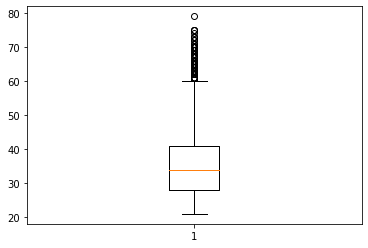

In [84]:
plt.boxplot(CrCdClients['AGE']);

In [49]:
max(CrCdClients['AGE'])

79

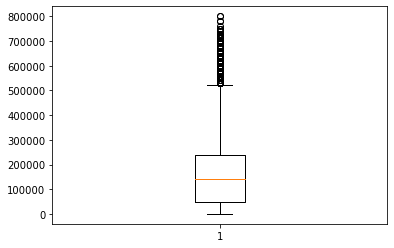

In [71]:
plt.boxplot(CrCdClients['LIMIT_BAL']);

In [51]:
max(CrCdClients['LIMIT_BAL'])

1000000.0

In order to remove these outliers, we replace the maximum values in the 'Age' and 'Limit_Bal' columns with their respective mean values. 

In [85]:
import statistics
Age_mean = statistics.mean(CrCdClients['AGE'])
Limit_Bal_mean = statistics.mean(CrCdClients['LIMIT_BAL'])

In [86]:
CrCdClients["AGE"] = np.where(CrCdClients["AGE"] ==79, Age_mean,CrCdClients["AGE"])
CrCdClients["LIMIT_BAL"] = np.where(CrCdClients["LIMIT_BAL"] ==1000000, Age_mean,CrCdClients["LIMIT_BAL"])

From the sklearn package we import various libraries which will provide us with several machine learning libraries to build our model.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve

We first create a new data set X which does not consist of the 'default' variable and another data set Y which only consists of the dependent variable that is 'default'.

In [94]:
X = CrCdClients.drop('default', axis=1)
Y = CrCdClients['default']

In [96]:
display(X.head())
display(Y.head())

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24.0,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000.0,2,2,2,26.0,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000.0,2,2,2,34.0,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000.0,2,2,1,37.0,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,1,2,1,57.0,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


ID
1    1
2    1
3    0
4    0
5    0
Name: default, dtype: int64

The features in our data set have different scales. The range of values in different columns is very different from one another. To have a similar scale, we will rescale the features. We first import the required library.

In [97]:
from sklearn.preprocessing import RobustScaler
Robust_Scaler = RobustScaler()

In [98]:
X_Rescaled = Robust_Scaler.fit_transform(X)

We now make the train test split.

In [176]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Rescaled, Y, test_size=0.1, random_state=123, stratify=Y)
#stratify = Y will maintain the proportion of '0' and '1' in the test and train data set.

In the following step we create a function which will help us create a confusion matrix.

In [177]:
def CMatrix(CM, labels=['pay', 'default']):
    DataFrame = pd.DataFrame(data=CM, index = labels, columns = labels)
    DataFrame.index.name = 'TRUE'
    DataFrame.columns.name = 'PREDICTION'
    DataFrame.loc['Total'] = DataFrame.sum()
    DataFrame['Total'] = DataFrame.sum(axis = 1)
    return DataFrame

In the following step, we create a data frame which computes the values of the various evaluation metrics based on different algorithms.

In [178]:
EvaluationDF = pd.DataFrame(index = ['accuracy', 'precision', 'recall'],
                           columns= ['LogReg', 'ClassTree', 'NaiveBayes'])

So we will be constructing models based on 'Logistic Regression', 'Classification Tree' and 'Naive Bayes' to compute accuracy, precision and recall values.

Accuracy value will tell us how correctly the model will be able to predict and differentiate between defaulters and non-defaulters.

Precision value will tell us the number of times the model will be correct whenever it predicts and identifies default users.

The recall value will talk of the proportion of actual defaulters that the model will correctly predict as such.

To minimise the errors of the model, we will focus on reducing the value of false negatives. A false negative will occur whenever a customer will default but will be identified by the model as a payer. Having this error large can cause monetary loss to the business more than as compared to the other error. 

#### The first model we will create is the Logistic Regression model.

We first import the required libraries.

In [136]:
from sklearn.linear_model import LogisticRegression

In [179]:
LogReg = LogisticRegression(n_jobs=-1, random_state=15)

In the above cell an instance of the logictic regression estimator with argument asking the function to use all the codes which are available in the machine. The random_state argument performs the work of a set.seed function.

In [180]:
LogReg.fit(X_Train, Y_Train)

LogisticRegression(n_jobs=-1, random_state=15)

We now evaluate the model in order to find the required values.

In [181]:
Y_Pred_Test = LogReg.predict(X_Test)

In [182]:
EvaluationDF.loc['accuracy', 'LogReg'] = accuracy_score(y_pred=Y_Pred_Test, y_true=Y_Test)
EvaluationDF.loc['precision', 'LogReg'] = precision_score(y_pred=Y_Pred_Test, y_true=Y_Test)
EvaluationDF.loc['recall', 'LogReg'] = recall_score(y_pred=Y_Pred_Test, y_true=Y_Test)

In [183]:
CM = confusion_matrix(y_pred=Y_Pred_Test, y_true=Y_Test)
CMatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,2278,58,2336
default,518,146,664
Total,2796,204,3000


#### Next we create a Decision Tree model.

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [185]:
DecTree = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10)

In the above cell we have created an instance of the estimator with arguments which will control overfitting of our model.

In [186]:
DecTree.fit(X_Train, Y_Train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=30,
                       random_state=10)

We now evaluate the model in order to find the required values.

In [187]:
Y_Pred_Test =DecTree.predict(X_Test)

In [188]:
EvaluationDF.loc['accuracy', 'ClassTree'] = accuracy_score(y_pred=Y_Pred_Test, y_true=Y_Test)
EvaluationDF.loc['precision', 'ClassTree'] = precision_score(y_pred=Y_Pred_Test, y_true=Y_Test)
EvaluationDF.loc['recall', 'ClassTree'] = recall_score(y_pred=Y_Pred_Test, y_true=Y_Test)

In [189]:
CM = confusion_matrix(y_pred=Y_Pred_Test, y_true=Y_Test)
CMatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,2099,237,2336
default,450,214,664
Total,2549,451,3000


#### The final model which we create is the Naive Bayes Classifier.

In [190]:
from sklearn.naive_bayes import GaussianNB

In [191]:
NaiveBayes = GaussianNB()

Again, in the above cell we have created an instance of the estimator.

In [192]:
NaiveBayes.fit(X_Train, Y_Train)

GaussianNB()

The next step is to evaluate the model in order to find the required values.

In [193]:
Y_Pred_Test =NaiveBayes.predict(X_Test)

In [194]:
EvaluationDF.loc['accuracy', 'NaiveBayes'] = accuracy_score(y_pred=Y_Pred_Test, y_true=Y_Test)
EvaluationDF.loc['precision', 'NaiveBayes'] = precision_score(y_pred=Y_Pred_Test, y_true=Y_Test)
EvaluationDF.loc['recall', 'NaiveBayes'] = recall_score(y_pred=Y_Pred_Test, y_true=Y_Test)

In [195]:
CM = confusion_matrix(y_pred=Y_Pred_Test, y_true=Y_Test)
CMatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,1701,635,2336
default,240,424,664
Total,1941,1059,3000


The final data frame which we have is the following.

In [196]:
EvaluationDF*100

,LogReg,ClassTree,NaiveBayes
accuracy,80.8,77.1,70.8333
precision,71.5686,47.4501,40.0378
recall,21.988,32.2289,63.8554


Next we draw a graph to have an idea about the visualization of the matrix.

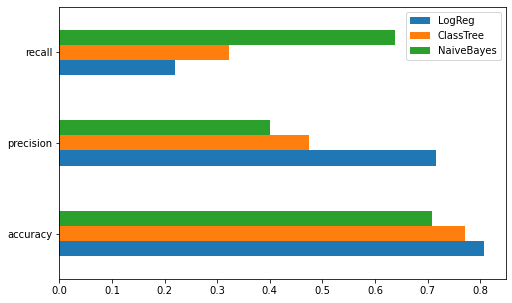

In [197]:
fig, ax = plt.subplots(figsize=(8,5))
EvaluationDF.plot(kind='barh', ax=ax)
ax.grid;

As the recall value is the most important for us to evaluate, Naive Bayes classifier seems to be the best model. Also, the threshold value can be modified to get a different set of values. Originally the threshold value has been set at 0.5.

Finally we define a function which predicts if the customer will default or pay.

In [198]:
def make_predictions(model):
    data = model.values.reshape(1, -1)
    data = Robust_Scaler.transform(data)
    prob = LogReg.predict_proba(data)[0][1]
    if prob >= 0.2:
        return 'Will Default'
    else:
        return 'Will Pay'